In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("diamonds.csv")

In [3]:
data.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [4]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

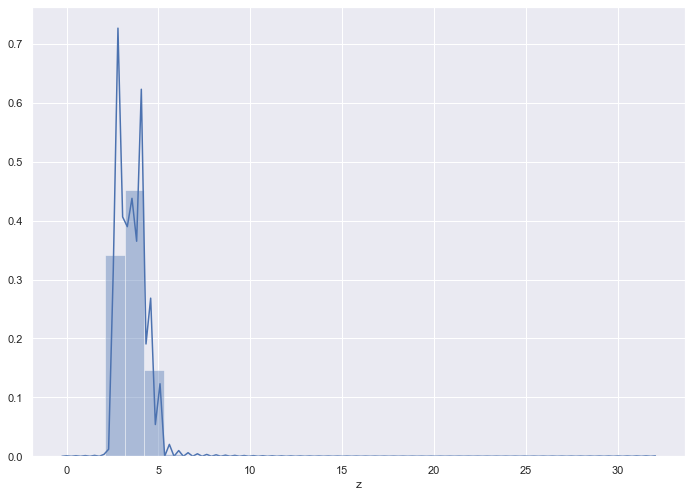

In [5]:
sns.set(rc ={'figure.figsize':(11.7,8.27)})
sns.distplot(data['z'],bins=30)
plt.show()

In [6]:
data.drop("Unnamed: 0",inplace=True,axis=1)

In [7]:
data


carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

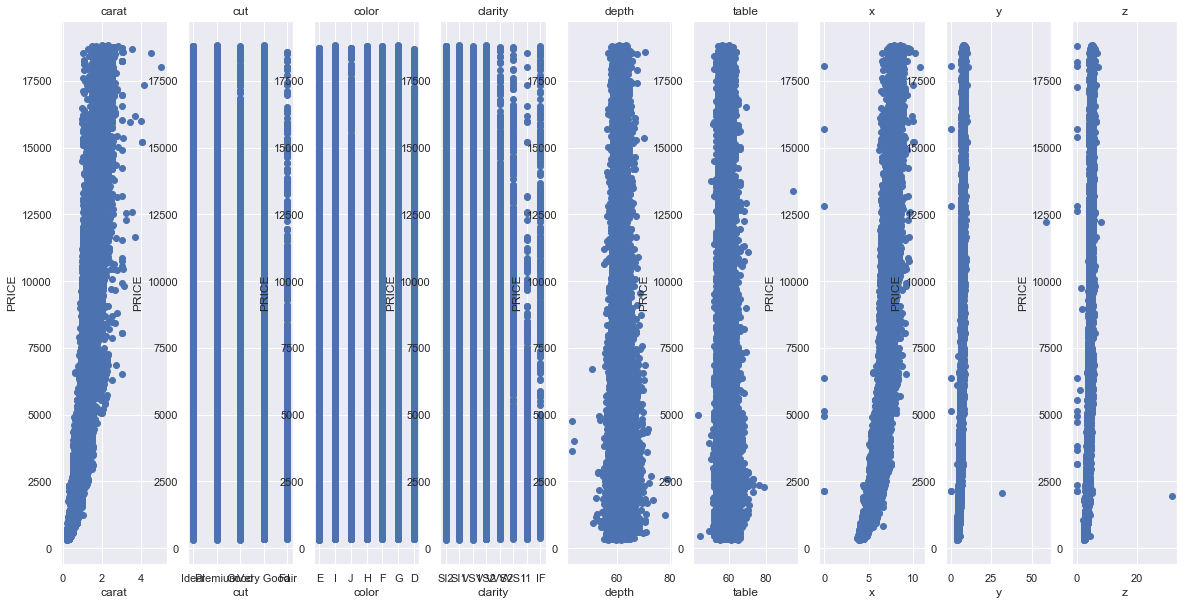

In [8]:
plt.figure(figsize=(20, 10))

features = ['carat', 'cut','color','clarity','depth','table','x','y','z']
target = data['price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICE')

In [9]:
data = data[(data[['x','y','z']] != 0).all(axis=1)]

In [10]:
data.drop(['x','y','z'], axis=1, inplace= True)

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
data

carat        cut color clarity  depth  table  price
0       0.23      Ideal     E     SI2   61.5   55.0    326
1       0.21    Premium     E     SI1   59.8   61.0    326
2       0.23       Good     E     VS1   56.9   65.0    327
3       0.29    Premium     I     VS2   62.4   58.0    334
4       0.31       Good     J     SI2   63.3   58.0    335
...      ...        ...   ...     ...    ...    ...    ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757
53936   0.72       Good     D     SI1   63.1   55.0   2757
53937   0.70  Very Good     D     SI1   62.8   60.0   2757
53938   0.86    Premium     H     SI2   61.0   58.0   2757
53939   0.75      Ideal     D     SI2   62.2   55.0   2757

[53920 rows x 7 columns]

In [13]:
from sklearn import preprocessing 

label_cut = preprocessing.LabelEncoder()
label_color = preprocessing.LabelEncoder()
label_clarity = preprocessing.LabelEncoder()


data['cut'] = label_cut.fit_transform(data['cut'])
data['color'] = label_color.fit_transform(data['color'])
data['clarity'] = label_clarity.fit_transform(data['clarity'])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [14]:
data.head()

carat  cut  color  clarity  depth  table  price
0   0.23    2      1        3   61.5   55.0    326
1   0.21    3      1        2   59.8   61.0    326
2   0.23    1      1        4   56.9   65.0    327
3   0.29    3      5        5   62.4   58.0    334
4   0.31    1      6        3   63.3   58.0    335

In [15]:
X = data.drop(columns = 'price')
Y = data['price']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(43136, 6)
(10784, 6)
(43136,)
(10784,)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

model_1 = LinearRegression()
model_1.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
#model Evaluation
y_train_predict = model_1.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
model_score = r2_score(Y_train,y_train_predict) 
print("model Performance for training dataset RMSE : {} and R2 Score {}".format(rmse,model_score))
y_test_predict = model_1.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
model_score_test = r2_score(Y_test,y_test_predict) 
print("model Performance for testing dataset RMSE : {} and R2 Score {}".format(rmse_test,model_score_test))

model Performance for training dataset RMSE : 1384.2053728743565 and R2 Score 0.8802781616608637
model Performance for testing dataset RMSE : 1359.9720345753333 and R2 Score 0.8804791459225707


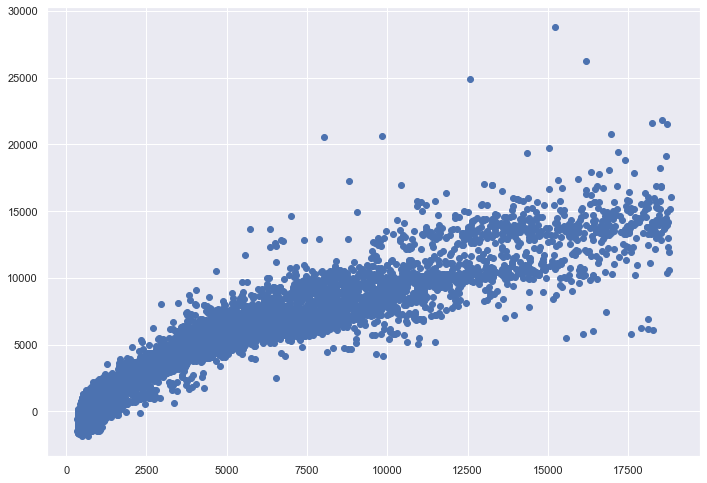

In [19]:
plt.scatter(Y_test, y_test_predict)
plt.show()

In [20]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train,Y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [21]:
alpha = lasscv.alpha_
alpha

0.01775236900431306

In [23]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,Y_train)

Lasso(alpha=0.01775236900431306, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [24]:
lasso_reg.score(X_test, Y_test)

0.8804792897960615

In [25]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, Y_train)

RidgeCV(alphas=array([8.01000184, 6.89182859, 6.93946963, 6.79489876, 4.21157789,
       1.97460766, 0.594623  , 5.73866854, 3.26661334, 4.4212017 ,
       5.57146071, 0.22206312, 5.78639767, 9.41307607, 5.12993075,
       8.77650415, 5.71228303, 2.77131073, 0.58125808, 0.69547811,
       8.97248316, 3.24009905, 1.9813111 , 8.44016725, 7.40749098,
       3.48356962, 4.90480123, 4.76587643, 5.13743809, 7.08055388,
       0.14110438, 0.17097352, 2.48221263, 5.95439629, 9.91483752,
       2.16674229, 6.14485439, 6.68038044, 5.0809544 , 0.92554577,
       5.75463791, 7.64668849, 8.67798374, 3.466507  , 1.30032668,
       5.69808098, 4.57594386, 7.25951655, 4.97079136, 6.45250218]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [26]:
ridgecv.alpha_

0.14110438068966724

In [28]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, Y_train)

Ridge(alpha=0.14110438068966724, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
ridge_model.score(X_test, Y_test)

0.880479375165468

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , Y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = Y_train, cv = 5,verbose = 1)
y_pred = clf_rf.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % clf_rf.score(X_test, Y_test))
print(accuracies)

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred)**0.5
r2 = r2_score(Y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.4s finished



###### Random Forest ######
Score : 0.9794
[0.97940965 0.97879938 0.97826502 0.9778909  0.97678887]

MSE    : 319238.39 
MAE    : 292.42 
RMSE   : 565.01 
R2     : 0.98 


In [35]:
import pickle
model_final = 'finalizedmodel.sav'
pickle.dump(clf_rf,open(model_final,'wb'))